In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM

In [6]:
label = np.load('./preprocessing/keypoints/concatnated_label.npy')
label.shape

(302378,)

In [7]:
arrays = []

path = './preprocessing/keypoints/keypoints_save/'

for filename in tqdm(os.listdir(path)):
    file_path = os.path.join(path, filename)
    array = np.load(file_path)
    arrays.append(array)

combined_array = np.concatenate(arrays, axis=0)

combined_array.shape

100%|██████████| 3000/3000 [00:01<00:00, 2497.20it/s]


(302378, 33, 3)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_data = le.fit_transform(label)
y_data

array([ 0,  0,  0, ..., 70, 70, 70], dtype=int64)

In [9]:
unique_values = np.unique(label)
len(unique_values)

419

In [10]:
print(combined_array.shape)
print(y_data.shape)

(302378, 33, 3)
(302378,)


In [11]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(y_data, num_classes=419)

In [14]:
from sklearn.model_selection import train_test_split

x_data = combined_array.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_test, y_train, y_test = train_test_split(combined_array, y_data, test_size=0.2)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(x_train.shape[1], x_train.shape[2])

(241902, 33, 3) (60476, 33, 3)
(241902, 419) (60476, 419)
33 3


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten

model = Sequential([
    LSTM(64, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    LSTM(128, return_sequences=True),
    LSTM(256, return_sequences=False),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 33, 64)            17408     
_________________________________________________________________
lstm_10 (LSTM)               (None, 33, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 256)               394240    
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 419)               54051     
Total params: 597,411
Trainable params: 597,411
Non-trainable params: 0
________________________________________________

In [26]:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping()

# EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 0, mode = 'auto')
hist = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=80
)

Epoch 1/80
7560/7560 [==============================] - 106s 14ms/step - loss: 5.4034 - accuracy: 0.0201 - val_loss: 4.9327 - val_accuracy: 0.0460
Epoch 2/80
7560/7560 [==============================] - 101s 13ms/step - loss: 4.2298 - accuracy: 0.1022 - val_loss: 3.6993 - val_accuracy: 0.1600
Epoch 3/80
7560/7560 [==============================] - 103s 14ms/step - loss: 3.2747 - accuracy: 0.2235 - val_loss: 2.9043 - val_accuracy: 0.2854
Epoch 4/80
7560/7560 [==============================] - 103s 14ms/step - loss: 2.7280 - accuracy: 0.3214 - val_loss: 2.6053 - val_accuracy: 0.3448
Epoch 5/80
7560/7560 [==============================] - 108s 14ms/step - loss: 2.3985 - accuracy: 0.3873 - val_loss: 2.3470 - val_accuracy: 0.4004
Epoch 6/80
7560/7560 [==============================] - 113s 15ms/step - loss: 2.1631 - accuracy: 0.4371 - val_loss: 2.2797 - val_accuracy: 0.4192
Epoch 7/80
7560/7560 [==============================] - 114s 15ms/step - loss: 1.9644 - accuracy: 0.4809 - val_loss: 2

NameError: name 'hist' is not defined

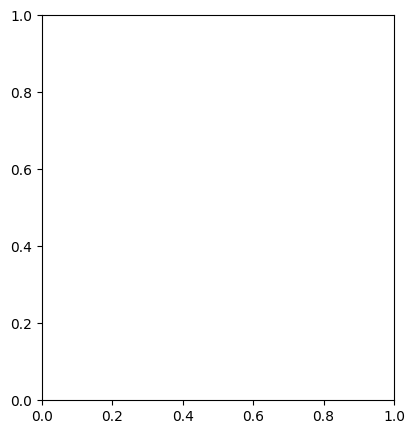

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [54]:
model.save('./model/model_1')

AttributeError: module 'h5py' has no attribute 'File'